In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from tabulate import tabulate
import statistics

In [2]:
industry_df = pd.read_excel("Industry_Portfolios.xlsx")

C:\Users\bryan\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
market_df = pd.read_excel("Market_Portfolio.xlsx")

C:\Users\bryan\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


### Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

 > Create a table showing the intercept and slope coefficients for the ten industry portfolios.

In [4]:
excess_market_df = market_df - 0.13
excess_industry_df = industry_df - 0.13

name = []
alpha = []
beta = []

results = []
for col in excess_industry_df:
    result = np.polyfit(excess_market_df["Market"], excess_industry_df[col], deg=1)
    name.append(col)
    alpha.append(result[1])
    beta.append(result[0])
    
    
# Exclude the date
name = name[1:]
alpha = alpha[1:]
beta = beta[1:]

#tabulate
table = zip(name, alpha, beta)
col_names = ["Name","Intercept Coefficient","Slope Coefficient"]
print(tabulate(table, headers = col_names))

Name      Intercept Coefficient    Slope Coefficient
------  -----------------------  -------------------
NoDur                 0.369443              0.652647
Durbl                -0.415599              1.64854
Manuf                 0.159771              1.16985
Enrgy                 0.501719              0.96985
HiTec                -0.0640195             1.13297
Telcm                 0.194691              0.900729
Shops                 0.275492              0.826492
Hlth                  0.237841              0.673036
Utils                 0.444585              0.538086
Other                -0.387135              1.20731


>Briefly explain the economic significance of the intercept and slope coefficients.

The intercept coefficient (α) represents the difference in expected return to the CAPM. If CAPM is correct, the intercept coefficient will be zero. The intercept coefficient represents "pricing error" relative to CAPM for individual assets or passive portfolios.\
The slope coefficient (β) measures the amount of exposure to systematic market risk, when investing in an asset or portfolio.It reflects the degree to which the industry portfolio's performance is influenced by the overall market movement. A higher β implies that the industry portfolio's returns are more closely tied to the market's performance, whereas a lower β suggests that the industry portfolio's returns are less affected by market fluctuations.Market risk is undiversifiable.

### Security Market Line (SML)

Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Warning: the results may be very different from what you would expect!)

>Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

Text(0.5, 1.0, 'Security Market Line (SML)')

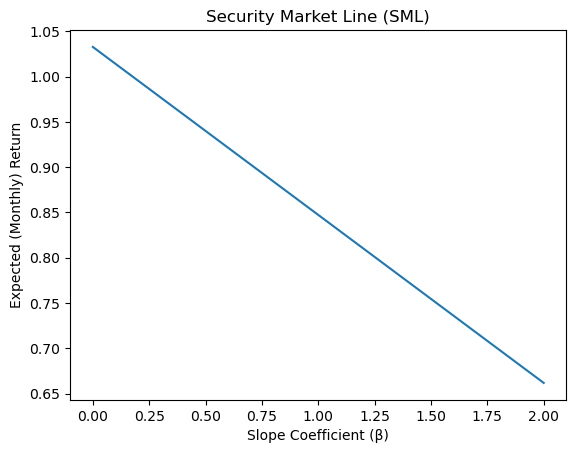

In [5]:
mean = []
for col in industry_df:
    values = industry_df[col]
    mean_return = statistics.mean(values)
    mean.append(mean_return)
    
mean = mean[1:]

#market portfolio mean
market_mean = statistics.mean(market_df["Market"])
mean.append(market_mean)

#add market portfolio to beta values
market_beta = 1
beta.append(market_beta)

#regression
result = np.polyfit(beta, mean, deg=1)
result

x = [0,2]
y = [result[1],2*result[0] + result[1]]
plt.plot(x,y)
plt.ylabel("Expected (Monthly) Return")
plt.xlabel("Slope Coefficient (β)")
plt.title("Security Market Line (SML)")



> Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)

Text(0.5, 1.0, 'Security Market Line (SML)')

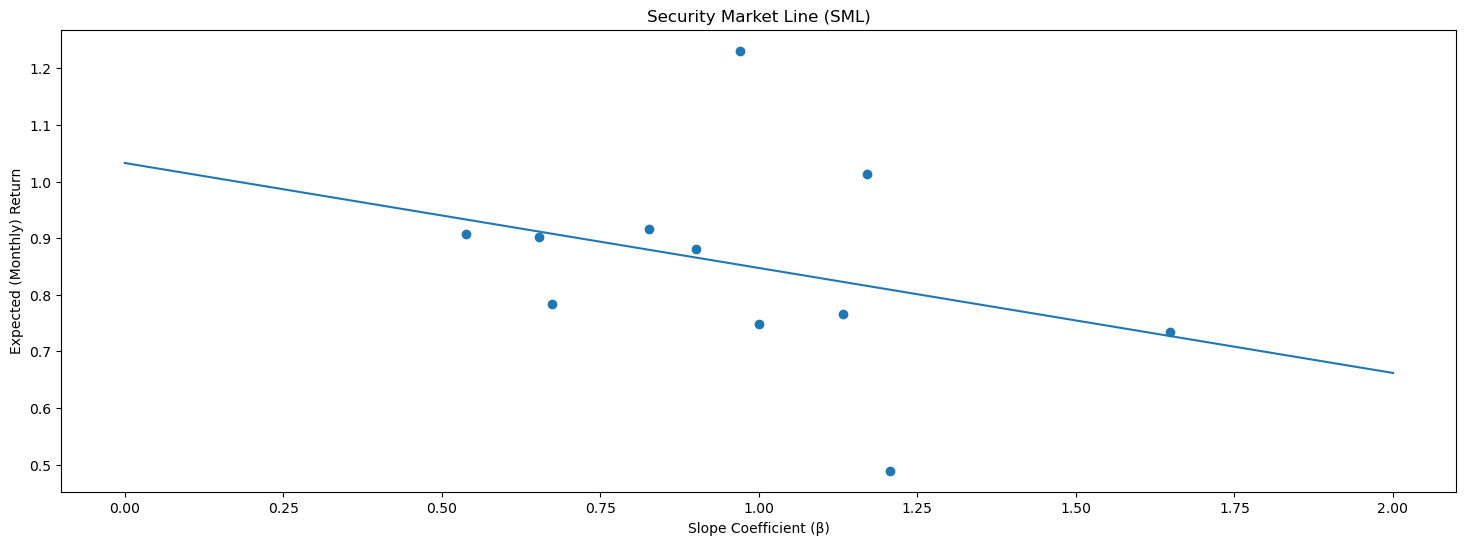

In [6]:
plt.figure(figsize = (18, 6))
plt.scatter(beta,mean)


x = [0,2]
y = [result[1],2*result[0] + result[1]]
plt.plot(x,y)
plt.ylabel("Expected (Monthly) Return")
plt.xlabel("Slope Coefficient (β)")
plt.title("Security Market Line (SML)")


> Briefly explain the economic significance of the SML.

Security Market Line (SML) is a graphical representation of CAPM pricing formula. Slope of SML represents ratio of risk premium to beta, or treynor ratio. All risky assets must have the same treynor ratio in equilibrium. Asset that lies above SML is underpriced, so investors will buy asset, causing price to rise and the expected return to fall back to the SML. Conversely, asset that lies below SML is overpriced, so investors will sell asset, causing price to fall and expected return to rise until asset is back to the SML.